<a href="https://colab.research.google.com/github/IanChoi2464/Machine-Learning-Colab/blob/main/8-2%20Image%20Classification%20using%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

케라스 API를 사용해 합성곱 신경망 모델을 만들어 패션 MNIST 이미지를 분류한다.
# Function
### **Tensorflow**
**Conv2D**: 입력의 너비와 높이 방향의 합성곱 연산을 구현한 클래스\
첫 번째 매개변수는 합성곱 필터의 개수\
kernel_size 매개변수는 필터의 커널 크기를 지정, 가로세로 크기가 같은 경우 정수 하나로, 다느 경우 정수의 튜플로 지정 가능, 일반적으로 커널의 가로세로 크기는 동일, 커널의 깊이는 입력의 깊이와 동일하기 때문에 따로 지정하지 않음\
strides 매개변수는 필터의 이동 간격을 지정, 가로세로 크기가 같은 경우 정수 하나로, 다른 경우 정수의 튜플로 지정 가능, 일반적으로 가로세로 스트라이드 크기는 동일, 기본값은 1\
padding 매개변수는 입력의 패딩 타입을 지정, 기본값 'valid'는 패딩을 하지 않음, 'same'은 합성곱 층의 출력의 가로세로 크기를 입력과 동일하게 맞추도록 입력에 패딩을 추가\
activation 매개변수는 합성곱 층에 적용할 활성화 함수를 지정\
**MaxPolling2D**: 입력의 너비와 높이를 줄이는 풀링 연산을 구현한 클래스\
첫 번째 매개변수는 풀링의 크기를 지정, 가로세로 크기가 같은 경우 정수 하나로, 다른 경우 정수의 튜플로 지정 가능, 일반적으로 풀링의 가로세로 크기는 같게 지정\
strides 매개변수는 풀링의 이동 간격을 지정, 기본값은 풀링의 크기롸 동일, 즉 입력 위를 겹쳐서 풀링하지 않음\
padding 매개변수는 입력의 패딩 타입을 지정, 기본값 'valid'는 패딩을 하지 않음, 'same'은 합성곱 층의 출력의 가로세로 크기를 입력과 동일하게 맞추도록 입력에 패딩을 추가\
**plot_model()**: 케라스 모델 구조를 주피터 노트북에 그리거나 파일로 저장\
첫 번째 매개변수에 케라스 모델 객체를 전달\
to_file 매개변수에 파일 이름을 지정하면 그림을 파일로 저장\
show_shapes 매개변수를 True로 지정하면 층의 입력, 출력 크기를 표시함, 기본값은 False\
show_layer_names 매개변수를 True로 지정하면 층 이름을 출력함, 기본값은 True
### **matplotlib**
bar(): 막대그래프를 출력\
첫 번째 매개변수에 x축의 값을 리스트나 넘파이 배열로 전달\
두 번째 매개변수에 막대의 y축 값을 리스트나 넘파이 배열로 전달\
width 매개변수에서 막대의 두께를 지정 가능, 기본값은 0.8
# Tip
1. predict() 메서드에 데이터를 전달할 때는 슬라이싱을 사용한다. 케라스의 fit(), predict(), evaluate() 메서드는 모두 입력의 첫 번째 차원이 배치 차원일 것으로 기대한다.

In [ ]:
"""이미지 데이터 준비하기"""
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

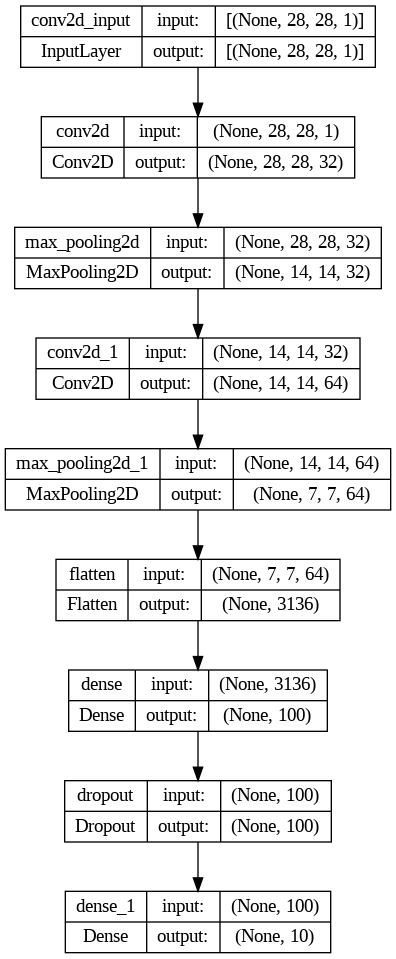

In [ ]:
"""합성곱 신경망 만들기"""
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
keras.utils.plot_model(model)
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
"""컴파일과 훈련"""
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 43s 28ms/step - loss: 0.5254 - accuracy: 0.8117 - val_loss: 0.3430 - val_accuracy: 0.8750
Epoch 2/20
   7/1500 [..............................] - ETA: 30s - loss: 0.3510 - accuracy: 0.8795

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 37s 25ms/step - loss: 0.3549 - accuracy: 0.8722 - val_loss: 0.3011 - val_accuracy: 0.8870
Epoch 3/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.3067 - accuracy: 0.8879 - val_loss: 0.2567 - val_accuracy: 0.9036
Epoch 4/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.2722 - accuracy: 0.9018 - val_loss: 0.2392 - val_accuracy: 0.9123
Epoch 5/20
1500/1500 [==============================] - 35s 24ms/step - loss: 0.2437 - accuracy: 0.9105 - val_loss: 0.2285 - val_accuracy: 0.9149
Epoch 6/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.2247 - accuracy: 0.9181 - val_loss: 0.2238 - val_accuracy: 0.9178
Epoch 7/20
1500/1500 [==============================] - 38s 26ms/step - loss: 0.2075 - accuracy: 0.9235 - val_loss: 0.2223 - val_accuracy: 0.9175
Epoch 8/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.1917 - accuracy: 0.9298 - val_loss: 0.2295 - val_accura

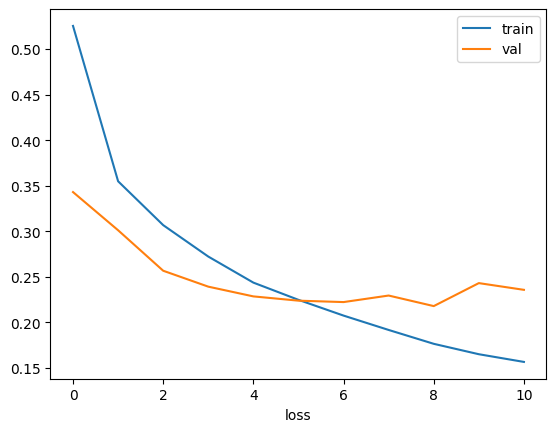

In [ ]:
"""그려보기"""
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.xlabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
"""evaluate()"""
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 7ms/step - loss: 0.2179 - accuracy: 0.9233


[0.21788950264453888, 0.9233333468437195]

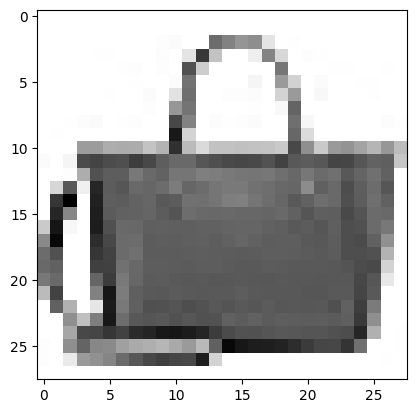

1/1 [==============================] - 0s 68ms/step
[[1.0069687e-19 2.8818963e-23 4.2440368e-22 1.0929160e-20 5.4885167e-18
  1.4212464e-18 6.1803492e-19 6.2210005e-22 1.0000000e+00 8.4273058e-23]]


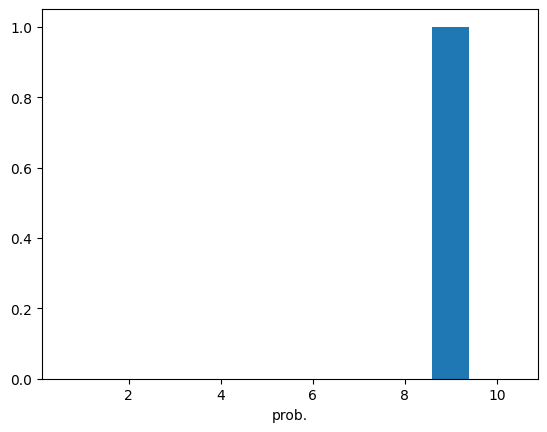

가방


In [ ]:
"""predict()"""
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

preds = model.predict(val_scaled[0:1])
print(preds)

plt.bar(range(1,11), preds[0])
plt.xlabel('range')
plt.xlabel('prob.')
plt.show()

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

import numpy as np
print(classes[np.argmax(preds)])

In [ ]:
"""test"""
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 7ms/step - loss: 0.2399 - accuracy: 0.9156


[0.23994450271129608, 0.9156000018119812]